In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time


from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, mean_squared_error, r2_score

In [68]:
import math

### Reading the 'train' file from the source folder

In [69]:
df = pd.read_csv('C:/Users/Lakshay Arora/Desktop/Knight ML Assignment/Data/train.csv')

In [70]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [72]:
df.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [73]:
print(df['variety'].unique())
len_variety = len(df['variety'].unique())
len_variety

['Chardonnay' 'Red Blend' 'Nebbiolo' 'Bordeaux-style White Blend' 'Malbec'
 'Cabernet Sauvignon' 'Zinfandel' 'Pinot Noir' 'Sauvignon Blanc' 'Gamay'
 'Grüner Veltliner' 'Bordeaux-style Red Blend' 'Sangiovese' 'Syrah'
 'White Blend' 'Cabernet Franc' 'Portuguese Red' 'Portuguese White'
 'Rhône-style Red Blend' 'Rosé' 'Champagne Blend' 'Merlot' 'Riesling'
 'Sparkling Blend' 'Pinot Grigio' 'Tempranillo' 'Pinot Gris'
 'Gewürztraminer']


28

In [74]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

## Visualization

### Visualization of top 5 varieties of wine in the train dataset

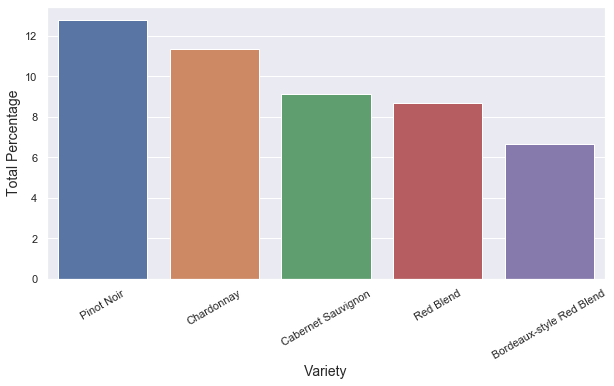

In [75]:
df_variety =(df['variety'].value_counts().head() / len(df))
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.barplot(x=df_variety.index , y=df_variety.values*100)
ax.set_xlabel("Variety",fontsize=14)
ax.set_ylabel("Total Percentage",fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

### Visualization of top 5 countries of origin in the dataset

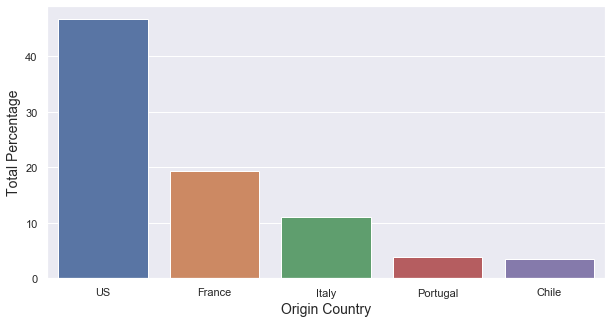

In [76]:

df_country=(df['country'].value_counts().head() / len(df))
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.barplot(x=df_country.index , y=df_country.values*100)
ax.set_xlabel("Origin Country",fontsize=14)
ax.set_ylabel("Total Percentage",fontsize=14)
plt.show()

### Now we calculate the percentage of reviews from these top 5 countries 

In [77]:
percent_country = df['country'].value_counts().head().sum()/df['country'].count()
print(' {} percent reviews are from top 5 countries'.format(percent_country*100))

 84.38551475393963 percent reviews are from top 5 countries


### Visualization of top 5 wines according to review titles

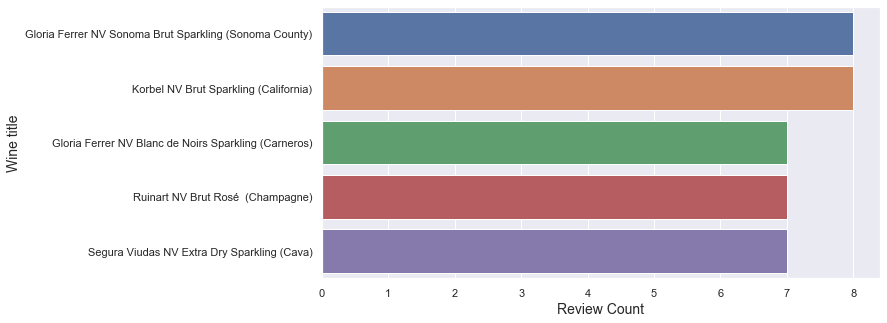

In [78]:
df_title=(df['review_title'].value_counts().head())
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.barplot(y=df_title.index , x=df_title.values)
ax.set_xlabel("Review Count",fontsize=14)
ax.set_ylabel("Wine title",fontsize=14)
plt.show()

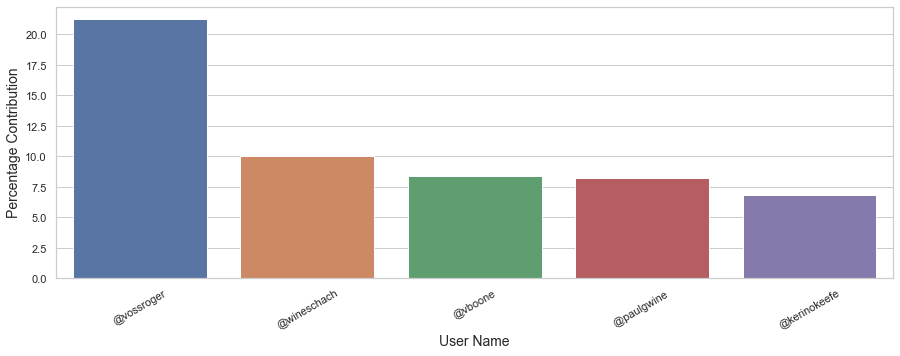

In [79]:
df_user=(df['user_name'].value_counts().head() / len(df))
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
ax = sns.barplot(x=df_user.index , y=df_user.values*100)
ax.set_xlabel("User Name",fontsize=14)
ax.set_ylabel("Percentage Contribution",fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

### So, user name =  @vossroger contributes maximum to the review entries

In [80]:
df_points = df['points'].value_counts().sort_index()
df_points

80       254
81       433
82      1184
83      1951
84      4174
85      5999
86      7641
87     10306
88     10504
89      7495
90      9929
91      7421
92      6412
93      4522
94      2704
95      1094
96       382
97       166
98        49
99        25
100       12
Name: points, dtype: int64

In [81]:
price = df['price'].value_counts().sort_index()
price

4.0         6
5.0        29
6.0        82
7.0       301
8.0       568
         ... 
1900.0      1
2000.0      2
2013.0      1
2500.0      1
3300.0      1
Name: price, Length: 351, dtype: int64

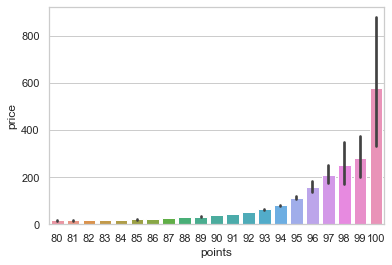

In [82]:

sns.barplot(x = 'points', y = 'price', data = df)

In [83]:
!pip install wordcloud

### WordCloud for 'review_description' is shown as follows

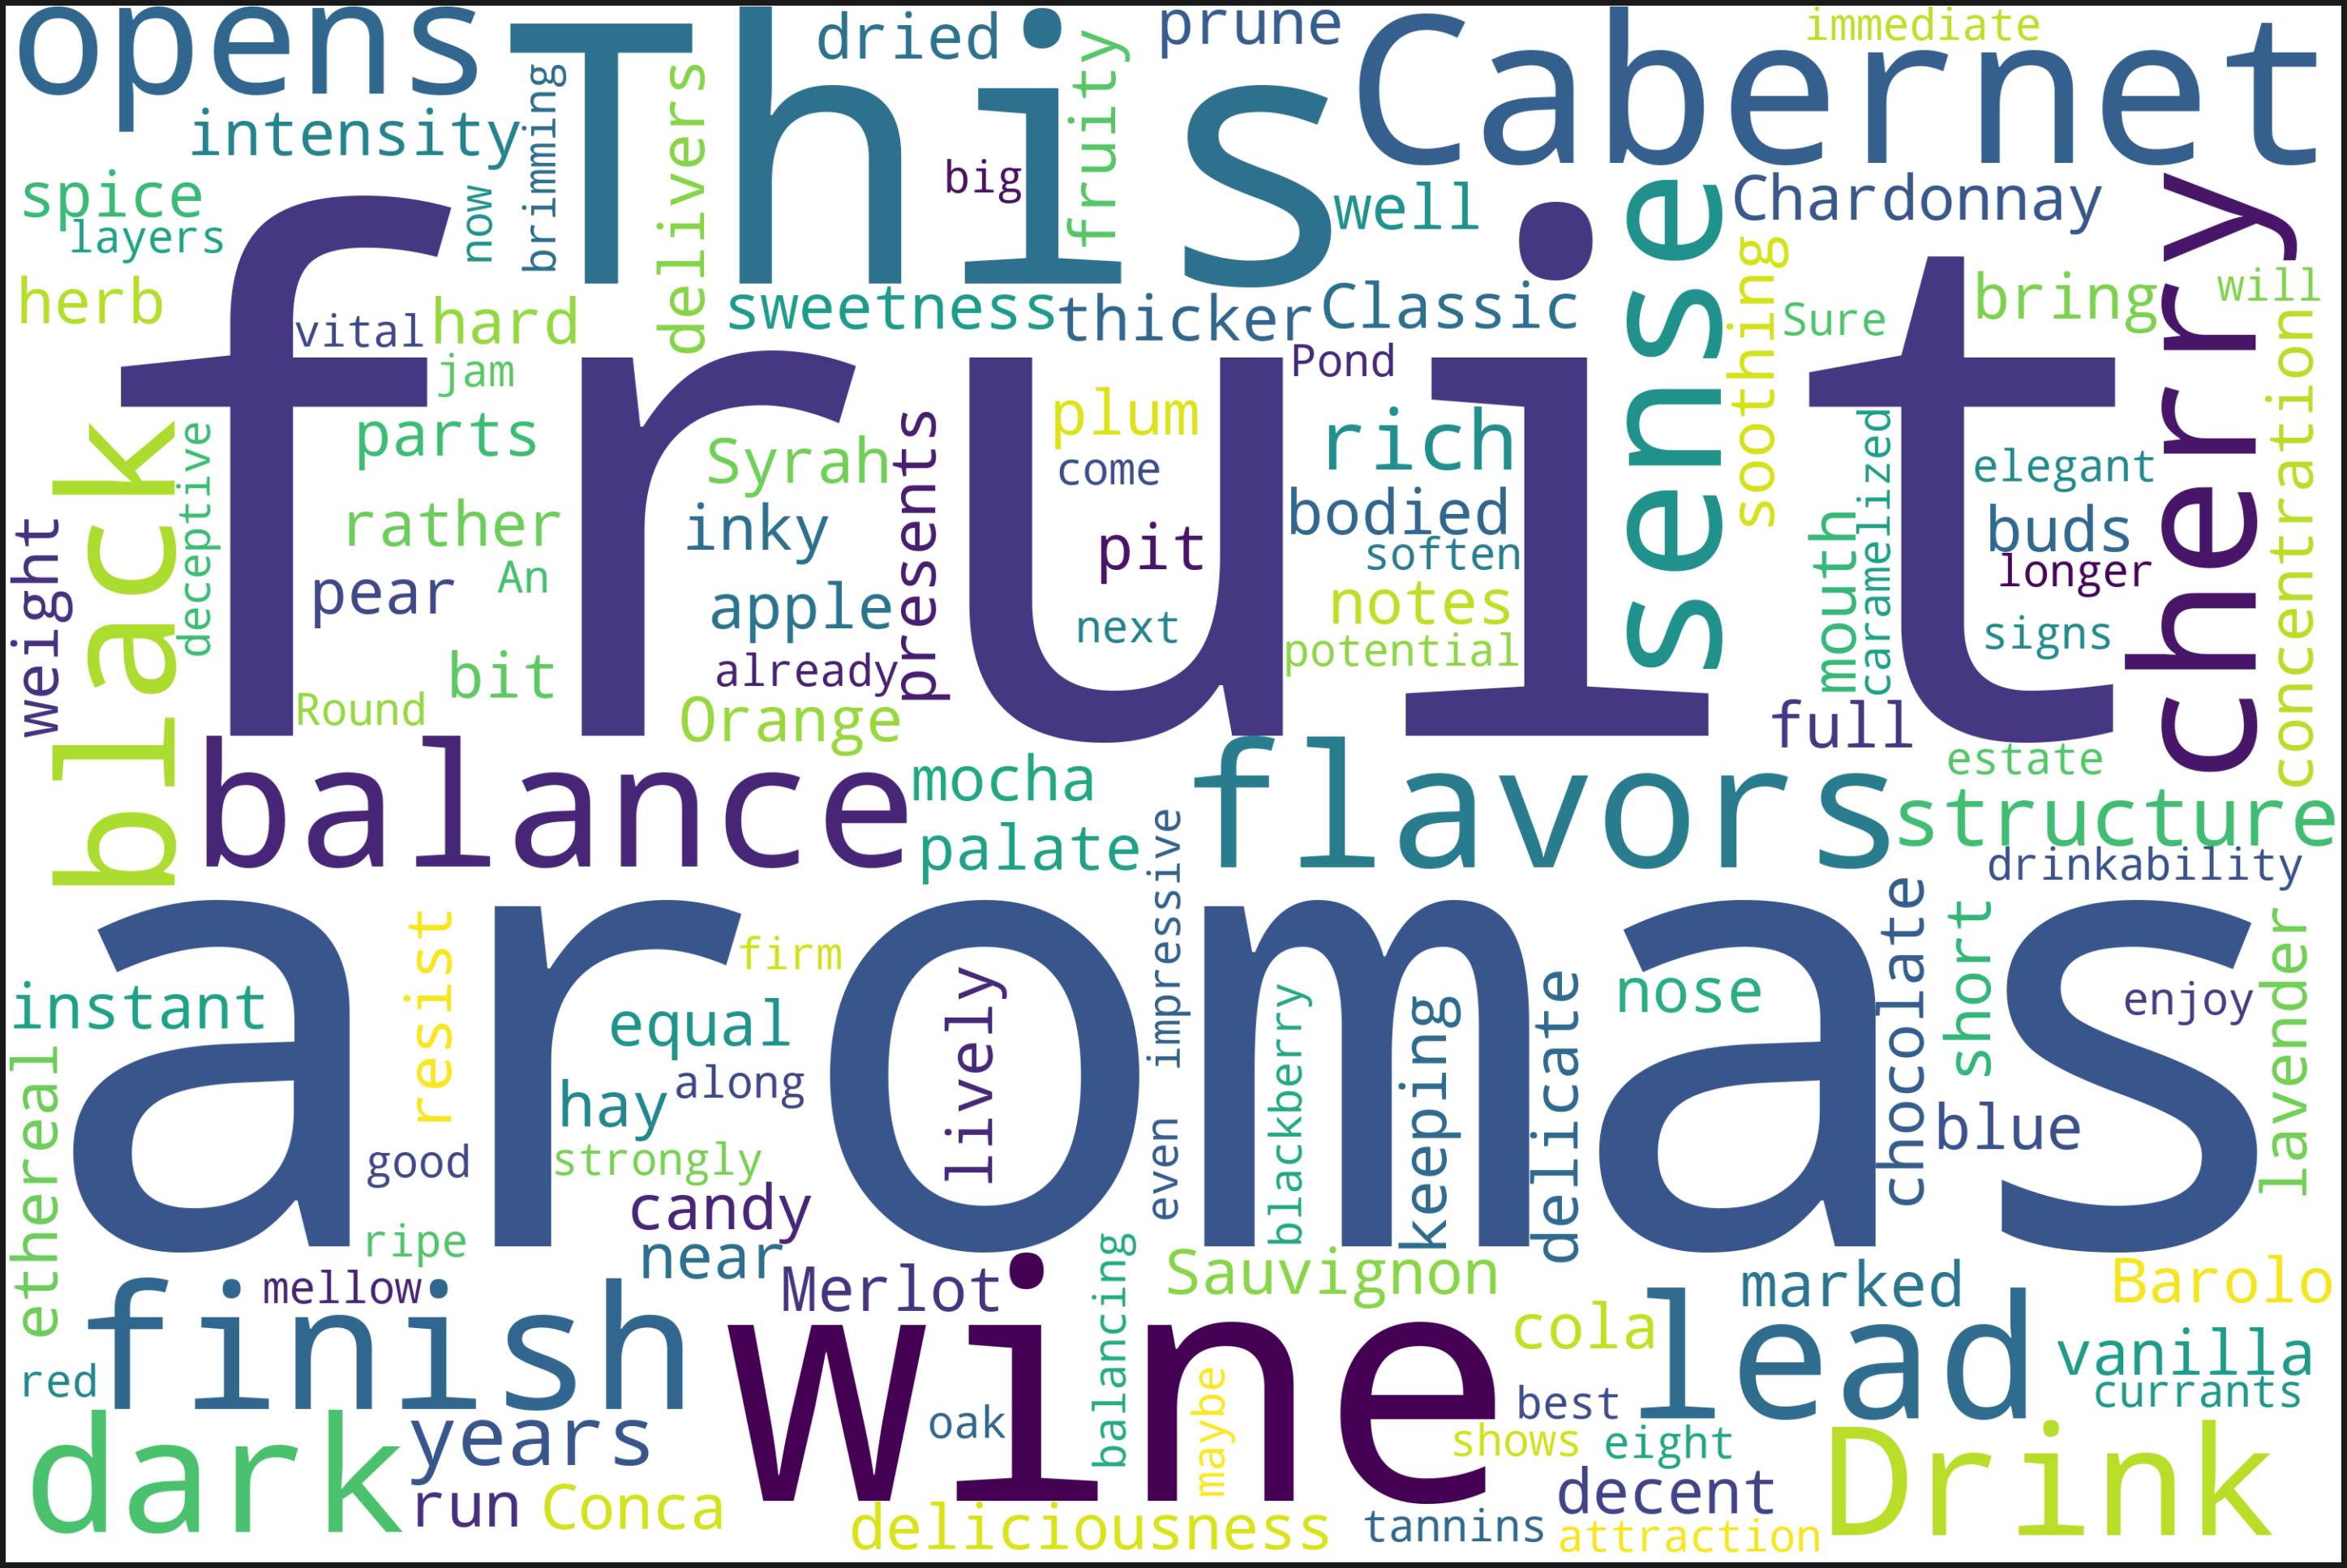

In [84]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.review_description.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Before proceeding further, let's make a 'Class' column which divides the data according to 'points'  

In [85]:
def classes(points):
    if(points <= 85):
        return 'Acceptable'
    elif(points<=90 ):
        return 'Good'
    elif(points<=95):
        return 'Very Good'
    elif(points<=100):
        return 'Excellent'
    else:
        return 'Bazinga'

In [86]:
df['Class'] = df['points'].apply(classes)

In [87]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,Class
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay,Acceptable
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend,Good
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,Very Good
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend,Good
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec,Good


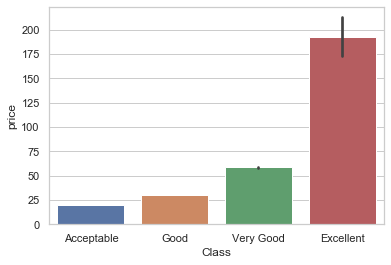

In [88]:
sns.barplot(x = 'Class', y = 'price', data = df)

### Now there are some NaN values in the 'price' series. Instead of removing NaN values in the 'price', we can define a function which would segregate the series into intervals and then we add a new column 'Price_Class' by applying the function 

In [89]:
def price_class(price):
    if(price <= 30):
        return '1-30'
    elif(price<=50):
        return '31-50'
    elif(price<=100): 
        return '51-100'
    elif(math.isnan(price)):
        return '0'
    else:
        return 'Above 100'

In [90]:
df['Price_Class'] = df['price'].apply(price_class)

In [91]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,Class,Price_Class
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay,Acceptable,1-30
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend,Good,1-30
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,Very Good,51-100
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend,Good,1-30
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec,Good,31-50


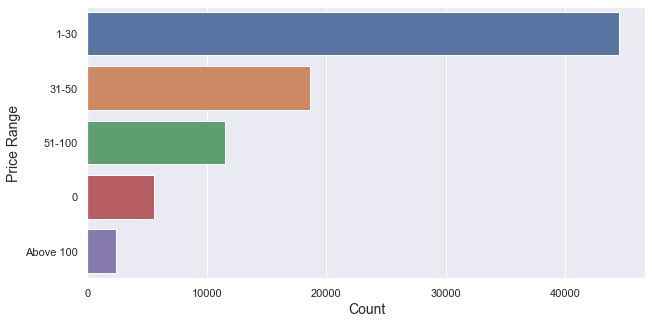

In [92]:
df_priceClass=(df['Price_Class'].value_counts())
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.barplot(y=df_priceClass.index , x=df_priceClass.values)
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("Price Range",fontsize=14)
plt.show()

In [93]:
df.groupby(df['Price_Class']).size()

Price_Class
0             5569
1-30         44497
31-50        18653
51-100       11559
Above 100     2379
dtype: int64

### Here, we can see there are 5569 NaN values are there for price

### Now, the text in the review_description is processed by CountVectorizer which is in the ScikitLearn Library

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
def Count_vector(text):
    vectorizer = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1, 2), max_features= 10000)
   
    vector = vectorizer.fit_transform(np.array(text))
    return vector, vectorizer



## Note: I have tried with max_features value from 10 till 10000. After which, its was difficult for me to form a vectorized dense array due to my GPU limitations.


In [96]:
vector, vectorizer = Count_vector(df['review_description'])

In [97]:
print(vector)
print(vectorizer)

  (0, 2012)	1
  (0, 1758)	1
  (0, 651)	1
  (0, 571)	1
  (0, 6525)	1
  (0, 4554)	1
  (0, 5077)	1
  (0, 6344)	1
  (0, 5554)	1
  (0, 2568)	1
  (0, 4858)	1
  (0, 1117)	1
  (0, 8625)	1
  (0, 6263)	1
  (0, 1605)	1
  (0, 6024)	1
  (0, 7569)	1
  (0, 7800)	1
  (0, 3378)	1
  (0, 654)	1
  (0, 601)	1
  (0, 5083)	1
  (0, 7801)	1
  (1, 651)	1
  (1, 5077)	1
  :	:
  (82656, 7147)	1
  (82656, 6107)	1
  (82656, 8085)	1
  (82656, 3098)	1
  (82656, 1097)	1
  (82656, 1622)	1
  (82656, 3146)	1
  (82656, 5589)	1
  (82656, 7532)	1
  (82656, 1078)	1
  (82656, 9911)	2
  (82656, 8555)	1
  (82656, 5632)	1
  (82656, 4893)	1
  (82656, 2477)	1
  (82656, 1157)	1
  (82656, 4771)	1
  (82656, 5439)	1
  (82656, 1477)	1
  (82656, 1105)	1
  (82656, 7152)	1
  (82656, 1847)	1
  (82656, 1623)	1
  (82656, 9424)	1
  (82656, 3423)	1
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_f

### Vocabulary for the review description is now displayed

In [98]:
print(vectorizer.vocabulary_)

{'classic': 2012, 'chardonnay': 1758, 'aromas': 651, 'apple': 571, 'pear': 6525, 'hay': 4554, 'lead': 5077, 'palate': 6344, 'marked': 5554, 'decent': 2568, 'intensity': 4858, 'bit': 1117, 'sweetness': 8625, 'orange': 6263, 'candy': 1605, 'notes': 6024, 'run': 7569, 'short': 7800, 'finish': 3378, 'aromas apple': 654, 'apple pear': 601, 'lead palate': 5083, 'short finish': 7801, 'wine': 9578, 'near': 5887, 'equal': 3130, 'parts': 6473, 'syrah': 8631, 'merlot': 5657, 'balance': 896, 'cabernet': 1563, 'sauvignon': 7639, 'blue': 1283, 'fruit': 3948, 'vanilla': 9269, 'cherry': 1805, 'herb': 4589, 'bodied': 1305, 'pit': 6719, 'flavors': 3511, 'bring': 1480, 'sense': 7741, 'deliciousness': 2620, 'hard': 4536, 'resist': 7246, 'equal parts': 3132, 'syrah merlot': 8641, 'balance cabernet': 898, 'cabernet sauvignon': 1569, 'aromas blue': 664, 'blue fruit': 1287, 'fruit vanilla': 4094, 'vanilla cherry': 9278, 'cherry herb': 1845, 'herb lead': 4603, 'lead bodied': 5078, 'fruit flavors': 4002, 'flavo

In [99]:
print(len(vectorizer.vocabulary_))

10000


In [100]:
x = vectorizer.transform(np.array([df['review_description'].iloc[0]]))
print(x)
print(df['review_description'].iloc[0])

  (0, 571)	1
  (0, 601)	1
  (0, 651)	1
  (0, 654)	1
  (0, 1117)	1
  (0, 1605)	1
  (0, 1758)	1
  (0, 2012)	1
  (0, 2568)	1
  (0, 3378)	1
  (0, 4554)	1
  (0, 4858)	1
  (0, 5077)	1
  (0, 5083)	1
  (0, 5554)	1
  (0, 6024)	1
  (0, 6263)	1
  (0, 6344)	1
  (0, 6525)	1
  (0, 7569)	1
  (0, 7800)	1
  (0, 7801)	1
  (0, 8625)	1
Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rather short finish.


In [101]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

df['variety']= label_encoder.fit_transform(df['variety']) 


In [102]:
y = df['variety']
X= vector.todense() ## densing of the review description array 


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [104]:
start = time.time()

lr = LogisticRegression(multi_class = 'ovr',solver='lbfgs', max_iter = 500)
model_lr = lr.fit(X_train, y_train)
accuracy_lr = model_lr.score(X_test, y_test)
print("Accuracy of the Logistic Regression model is {}%".format(round(accuracy_lr*100,2)))

end = time.time()

print('Runtime of this model is: ', end-start)

Accuracy of the Logistic Regression model is 70.41%
Runtime of this model is:  4773.642758369446


In [105]:
#start = time.time()

#svm = LinearSVC(max_iter = 3000)
#model_svm = svm.fit(X_train,y_train)
#accuracy_svm = model_svm.score(X_test, y_test)
#print("Accuracy of the Linear Support vector model is {}%".format(round(accuracy_svm*100,2)))

#end = time.time()

#print('Runtime of this model is: ', end-start)

In [106]:


start = time.time()
rfc = RandomForestClassifier(n_estimators=100)
model_rfc = rfc.fit(X_train, y_train)
accuracy_rfc = model_rfc.score(X_test, y_test)
print("Accuracy of the Random forest model is {}%".format(round(accuracy_rfc*100,2)))

end = time.time()

print('Runtime of this model is: ', end-start)

Accuracy of the Random forest model is 66.97%
Runtime of this model is:  661.3265602588654


### So, the best model is the Logistic Regression Model with accuracy of 70.41%

In [107]:
df_test = pd.read_csv('C:/Users/Lakshay Arora/Desktop/Knight ML Assignment/Data/test.csv')

In [108]:
df_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [109]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           15927 non-null  object 
 1   country             20661 non-null  object 
 2   review_title        20665 non-null  object 
 3   review_description  20665 non-null  object 
 4   designation         14676 non-null  object 
 5   points              20665 non-null  int64  
 6   price               19271 non-null  float64
 7   province            20661 non-null  object 
 8   region_1            17351 non-null  object 
 9   region_2            8914 non-null   object 
 10  winery              20665 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


In [110]:
len(df_test['review_description'])

20665

In [111]:
x_test = vectorizer.transform(df_test['review_description'].iloc[0:])
x_test
                                       
                                       
                                       
                                       
                                       
                                


<20665x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 627211 stored elements in Compressed Sparse Row format>

In [112]:
var = lr.predict(x_test)
var

array([14,  9,  5, ...,  3,  9,  3])

In [113]:
var = label_encoder.inverse_transform(var)
var

array(['Pinot Noir', 'Malbec', 'Chardonnay', ..., 'Cabernet Sauvignon',
       'Malbec', 'Cabernet Sauvignon'], dtype=object)

In [114]:
df_test['variety'] = var

In [115]:
df_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Malbec
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese
